# Plant Disease Detection

Dataset preparation

In [1]:
plnt_dses=r"D:\Data centr\IMG_data\Plant_Disease"
dses_train=r"D:\Data centr\IMG_data\Plant_Disease\train"
dses_val=r"D:\Data centr\IMG_data\Plant_Disease\valid"

In [2]:
img_h=128
img_w=128
btch_sze=32

Preprocessing

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
data_gen=ImageDataGenerator(
    rescale=1./255, # Normalize pixel val
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2 # 20% validation dataset
)

Split Training & Testing_dataset

In [5]:
train_data=data_gen.flow_from_directory(
    dses_train,
    target_size=(img_h,img_w),
    batch_size=btch_sze,
    class_mode="categorical",
    shuffle=False,  # No shuffling to preserve class order
    subset="training" # Training subset (80%)
)

# Map indices to class labels
class_indices = train_data.class_indices  # e.g., {'Plant1': 0, 'Plant2': 1, 'Plant3': 2}
classes = {v: k for k, v in class_indices.items()}  # Reverse the dictionary
print(f"Class mapping: {classes}")

Found 56251 images belonging to 38 classes.
Class mapping: {0: 'Apple___Apple_scab', 1: 'Apple___Black_rot', 2: 'Apple___Cedar_apple_rust', 3: 'Apple___healthy', 4: 'Blueberry___healthy', 5: 'Cherry_(including_sour)___Powdery_mildew', 6: 'Cherry_(including_sour)___healthy', 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 8: 'Corn_(maize)___Common_rust_', 9: 'Corn_(maize)___Northern_Leaf_Blight', 10: 'Corn_(maize)___healthy', 11: 'Grape___Black_rot', 12: 'Grape___Esca_(Black_Measles)', 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 14: 'Grape___healthy', 15: 'Orange___Haunglongbing_(Citrus_greening)', 16: 'Peach___Bacterial_spot', 17: 'Peach___healthy', 18: 'Pepper,_bell___Bacterial_spot', 19: 'Pepper,_bell___healthy', 20: 'Potato___Early_blight', 21: 'Potato___Late_blight', 22: 'Potato___healthy', 23: 'Raspberry___healthy', 24: 'Soybean___healthy', 25: 'Squash___Powdery_mildew', 26: 'Strawberry___Leaf_scorch', 27: 'Strawberry___healthy', 28: 'Tomato___Bacterial_spot', 29: '

In [6]:
val_data=data_gen.flow_from_directory(
    dses_val,
    target_size=(img_h,img_w),
    batch_size=btch_sze,
    class_mode="categorical",
    subset="validation" # Training subset (20%)
)
# Map indices to class labels
class_indices = val_data.class_indices  # e.g., {'Plant1': 0, 'Plant2': 1, 'Plant3': 2}
classes = {v: k for k, v in class_indices.items()}  # Reverse the dictionary
print(f"Class mapping: {classes}")

Found 3503 images belonging to 38 classes.
Class mapping: {0: 'Apple___Apple_scab', 1: 'Apple___Black_rot', 2: 'Apple___Cedar_apple_rust', 3: 'Apple___healthy', 4: 'Blueberry___healthy', 5: 'Cherry_(including_sour)___Powdery_mildew', 6: 'Cherry_(including_sour)___healthy', 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 8: 'Corn_(maize)___Common_rust_', 9: 'Corn_(maize)___Northern_Leaf_Blight', 10: 'Corn_(maize)___healthy', 11: 'Grape___Black_rot', 12: 'Grape___Esca_(Black_Measles)', 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 14: 'Grape___healthy', 15: 'Orange___Haunglongbing_(Citrus_greening)', 16: 'Peach___Bacterial_spot', 17: 'Peach___healthy', 18: 'Pepper,_bell___Bacterial_spot', 19: 'Pepper,_bell___healthy', 20: 'Potato___Early_blight', 21: 'Potato___Late_blight', 22: 'Potato___healthy', 23: 'Raspberry___healthy', 24: 'Soybean___healthy', 25: 'Squash___Powdery_mildew', 26: 'Strawberry___Leaf_scorch', 27: 'Strawberry___healthy', 28: 'Tomato___Bacterial_spot', 29: 'T

CNN Model preperation

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense, Dropout

In [8]:
model_CNN=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3)), # 1st Convolutional Layer
    MaxPooling2D((2,2)), # Pooling Layer
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    
    Flatten(), # Flatten Feature Maps
    Dense(128,activation='relu'), # Fully Connected Layer
    Dropout(0.5), # Dropout for Regularization
    Dense(len(train_data.class_indices), activation='softmax') # Output Layer (multi-class)
])

c:\Users\himan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model_CNN.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

Train the model

1,000 images and a batch size of 100, then 1 epoch = 10 batches.

In [10]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0


In [11]:
import torch
print("GPU Available: ", torch.cuda.is_available())


GPU Available:  False


In [12]:
with tf.device('/GPU:0'):
    history=model_CNN.fit(
    train_data,
    validation_data=val_data,
    epochs=20,
    steps_per_epoch=len(train_data),
    validation_steps=len(val_data)
    )

c:\Users\himan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 0s 730ms/step - accuracy: 0.0390 - loss: 3.5908

c:\Users\himan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1758/1758 ━━━━━━━━━━━━━━━━━━━━ 1344s 764ms/step - accuracy: 0.0390 - loss: 3.5908 - val_accuracy: 0.0828 - val_loss: 3.3922
Epoch 2/20
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 1392s 792ms/step - accuracy: 0.0856 - loss: 3.3795 - val_accuracy: 0.1416 - val_loss: 3.1304
Epoch 3/20
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 780s 444ms/step - accuracy: 0.1281 - loss: 3.1390 - val_accuracy: 0.1938 - val_loss: 2.8358
Epoch 4/20
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 1024s 583ms/step - accuracy: 0.1947 - loss: 2.8361 - val_accuracy: 0.2952 - val_loss: 2.4144
Epoch 5/20
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 870s 495ms/step - accuracy: 0.2717 - loss: 2.4851 - val_accuracy: 0.4008 - val_loss: 2.0305
Epoch 6/20
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 396s 225ms/step - accuracy: 0.3605 - loss: 2.1490 - val_accuracy: 0.5167 - val_loss: 1.6465
Epoch 7/20
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 413s 235ms/step - accuracy: 0.4141 - loss: 1.9389 - val_accuracy: 0.5495 - val_loss: 1.4651
Epoch 8/20
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 356s 202ms/step - accuracy: 

In [13]:
import matplotlib.pyplot as plt

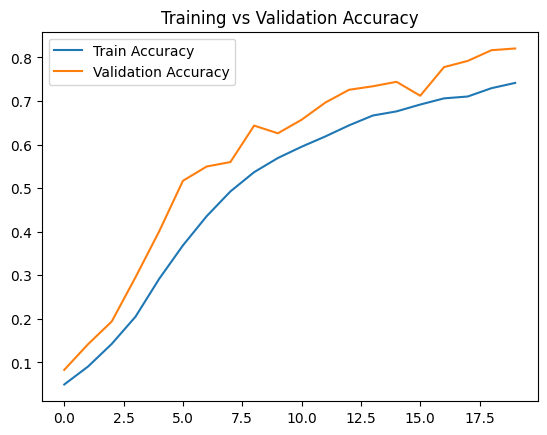

In [14]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()

Evaluate the model

In [15]:
val_loss,val_accuracy=model_CNN.evaluate(val_data)
print(f"Validation Loss: {val_loss*100:.2f}%")
print(f"Validation Accuracy: {val_accuracy*100:.2f}%")

110/110 ━━━━━━━━━━━━━━━━━━━━ 14s 127ms/step - accuracy: 0.8134 - loss: 0.5947
Validation Loss: 58.63%
Validation Accuracy: 81.76%


Class Mapping

In [16]:
class_name=list(train_data.class_indices.keys()) # dictionary of mapping class
print("class label: ",class_name)

class label:  ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Toma

Testing the model

In [17]:
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.applications.resnet50 import preprocess_input

In [18]:
def predicted_disease(test_img):
    # Load and preprocess the image
    img=image.load_img(test_img,target_size=(img_h,img_w))
    img_array=image.img_to_array(img)
    img_array=np.expand_dims(img_array,axis=0)
    img_array=preprocess_input(img_array)

    # Predict the flower type
    prediction=model_CNN.predict(img_array)
    prediction_class=class_name[np.argmax(prediction)]
    accuracy=np.max(prediction)

    # Ploting the image
    plt.figure(figsize=(6,6))
    plt.imshow(plt.imread(test_img))
    plt.axis("off")
    plt.title(f"Predicted: {prediction_class}\Accuracy: {accuracy * 100:.2f}%")
    plt.show()

    return prediction,accuracy


<>:17: SyntaxWarning: invalid escape sequence '\A'
<>:17: SyntaxWarning: invalid escape sequence '\A'
C:\Users\himan\AppData\Local\Temp\ipykernel_24020\359619647.py:17: SyntaxWarning: invalid escape sequence '\A'
  plt.title(f"Predicted: {prediction_class}\Accuracy: {accuracy * 100:.2f}%")


Normalization

In [19]:
from tensorflow.keras.layers import Rescaling

In [20]:
model_CNN_norm=tf.keras.Sequential([
    Rescaling(1./255, input_shape=(128,128,3)), # Normalize layer
    model_CNN
])

c:\Users\himan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


File Saving

In [21]:
import tensorflow as tf

In [22]:
model_CNN.save("plant_disease.h5")
print(model_CNN.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │         4,902 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,928,628 (37.87 MB)

 Trainable params: 3,309,542 (12.62 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,619,086 (25.25 MB)

None


In [23]:
converter=tf.lite.TFLiteConverter.from_keras_model(model_CNN)
tflite_model=converter.convert()

with open('plant_disease.tflite','wb') as f:
    f.write(tflite_model)
print(help(tf.lite.TFLiteConverter))

INFO:tensorflow:Assets written to: C:\Users\himan\AppData\Local\Temp\tmpg8mow2au\assets


INFO:tensorflow:Assets written to: C:\Users\himan\AppData\Local\Temp\tmpg8mow2au\assets


Saved artifact at 'C:\Users\himan\AppData\Local\Temp\tmpg8mow2au'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 38), dtype=tf.float32, name=None)
Captures:
  2913735034640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2913735034448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2913735034832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2913735035984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2913735035408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2913735036944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2913735035600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2913735037328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2913735038096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2913735039248: TensorSpec(shape=(), dtype=tf.resource, name=None)
Help o

Prediction Result

In [24]:
# Define the ImageDataGenerator for the test data
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Create a data generator for the test directory
test_generator = test_datagen.flow_from_directory(
    plnt_dses,
    target_size=(img_h, img_w),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 87900 images belonging to 3 classes.


In [25]:
# Predict on all test images
predictions = model_CNN.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
predicted_classes = np.argmax(predictions, axis=1)  # Predicted class indices
true_classes = test_generator.classes  # True class indices

# Print the results
for i, (pred, true) in enumerate(zip(predicted_classes, true_classes)):
    print(f"Image {i}: Predicted class = {class_name[pred]}, True class = {class_name[true]}")

c:\Users\himan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2747/2747 ━━━━━━━━━━━━━━━━━━━━ 649s 236ms/step
Image 0: Predicted class = Apple___Black_rot, True class = Apple___Apple_scab
Image 1: Predicted class = Apple___Cedar_apple_rust, True class = Apple___Apple_scab
Image 2: Predicted class = Tomato___Late_blight, True class = Apple___Apple_scab
Image 3: Predicted class = Corn_(maize)___Common_rust_, True class = Apple___Apple_scab
Image 4: Predicted class = Apple___Black_rot, True class = Apple___Apple_scab
Image 5: Predicted class = Corn_(maize)___Common_rust_, True class = Apple___Apple_scab
Image 6: Predicted class = Corn_(maize)___Common_rust_, True class = Apple___Apple_scab
Image 7: Predicted class = Corn_(maize)___Common_rust_, True class = Apple___Apple_scab
Image 8: Predicted class = Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot, True class = Apple___Apple_scab
Image 9: Predicted class = Corn_(maize)___Common_rust_, True class = Apple___Apple_scab
Image 10: Predicted class = Apple___Apple_scab, True class = Apple___Apple_scab


In [29]:
test_img = r"D:\Data centr\IMG_data\Plant_Disease\test\CornCommonRust1.JPG"

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


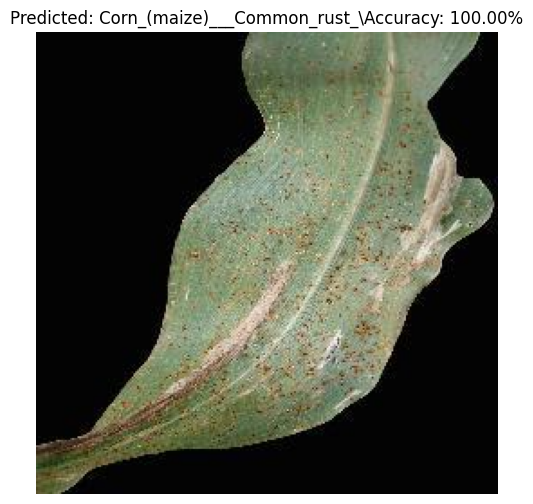

predicted Disease Type:[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]], confidence: 100.00%


In [30]:
disease_type,confidence=predicted_disease(test_img)
print(f"predicted Disease Type:{disease_type}, confidence: {confidence*100:.2f}%")